In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\newyork city airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,11/4/2019,0.32,3,334,0,NaN
1,5121.0,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/2019,0.32,2,365,0,NaN
2,5136.0,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,8/8/2021,0.02,1,201,1,NaN
3,5178.0,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,520,2/18/2022,3.33,1,154,46,NaN
4,5203.0,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,7/21/2017,0.77,1,0,0,NaN


In [3]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
37626,5.750000e+17,Queens flushing. Very convenient area.,204704622,Momoyo,Queens,Flushing,40.765396,-73.820677,Private room,27,30,0,NaN,NaN,126,57,0,NaN
37627,5.750000e+17,CONTACT BEFORE YOU BOOK R2,192407842,Aron,Manhattan,Harlem,40.826026,-73.950669,Private room,35,60,0,NaN,NaN,7,365,0,NaN
37628,5.750000e+17,CONTACT BEFORE YOU BOOK R1,192407842,Aron,Manhattan,Harlem,40.826355,-73.951875,Private room,28,30,0,NaN,NaN,7,334,0,NaN
37629,5.750000e+17,Super cosy and charming apartment,319140756,Andrea,Manhattan,Lower East Side,40.720062,-73.984825,Private room,84,1,0,NaN,NaN,1,357,0,NaN
37630,5.750000e+17,Well-kept apartment home | 2BR in New York,368944610,Casey,Manhattan,Murray Hill,40.743930,-73.973500,Entire home/apt,412,31,0,NaN,NaN,84,358,0,NaN


In [4]:
df.shape

(37631, 18)

In [5]:
df['latest_review'] = pd.to_datetime(df['last_review'])

In [6]:
df.dtypes

id                                       float64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                               object
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
latest_review                     datetime64[ns]
dtype: object

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,latest_review
0,2595.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,11/4/2019,0.32,3,334,0,NaN,2019-11-04
1,5121.0,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/2019,0.32,2,365,0,NaN,2019-12-02
2,5136.0,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,8/8/2021,0.02,1,201,1,NaN,2021-08-08
3,5178.0,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,520,2/18/2022,3.33,1,154,46,NaN,2022-02-18
4,5203.0,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,7/21/2017,0.77,1,0,0,NaN,2017-07-21


In [8]:
df.describe().round(0)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.763100e+04,37631.0,37631.0,37631.0,37631.0,37631.0,37631.0,28657.0,37631.0,37631.0,37631.0
mean,2.082629e+16,122323486.0,41.0,-74.0,166.0,20.0,25.0,1.0,15.0,129.0,6.0
std,1.056340e+17,136646068.0,0.0,0.0,307.0,29.0,53.0,2.0,46.0,141.0,17.0
min,2.595000e+03,2438.0,41.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,1.415543e+07,12048474.0,41.0,-74.0,68.0,2.0,1.0,0.0,1.0,0.0,0.0
50%,3.366773e+07,51772392.0,41.0,-74.0,112.0,30.0,4.0,0.0,1.0,66.0,0.0
75%,4.893624e+07,209921907.0,41.0,-74.0,180.0,30.0,22.0,1.0,4.0,275.0,4.0
max,5.750000e+17,447788073.0,41.0,-74.0,10000.0,1250.0,1024.0,90.0,332.0,365.0,849.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37631 entries, 0 to 37630
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              37631 non-null  float64       
 1   name                            37617 non-null  object        
 2   host_id                         37631 non-null  int64         
 3   host_name                       37544 non-null  object        
 4   neighbourhood_group             37631 non-null  object        
 5   neighbourhood                   37631 non-null  object        
 6   latitude                        37631 non-null  float64       
 7   longitude                       37631 non-null  float64       
 8   room_type                       37631 non-null  object        
 9   price                           37631 non-null  int64         
 10  minimum_nights                  37631 non-null  int64         
 11  nu

In [10]:
print(df.isnull().sum())

id                                    0
name                                 14
host_id                               0
host_name                            87
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8974
reviews_per_month                  8974
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           37630
latest_review                      8974
dtype: int64


In [11]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [12]:
df = df.drop('last_review',axis=1)

In [13]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,latest_review
0,2.595000e+03,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,48,0.320000,3,334,0,NaN,2019-11-04
1,5.121000e+03,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,0.320000,2,365,0,NaN,2019-12-02
2,5.136000e+03,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,5,2,0.020000,1,201,1,NaN,2021-08-08
3,5.178000e+03,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,520,3.330000,1,154,46,NaN,2022-02-18
4,5.203000e+03,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,0.770000,1,0,0,NaN,2017-07-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37626,5.750000e+17,Queens flushing. Very convenient area.,204704622,Momoyo,Queens,Flushing,40.765396,-73.820677,Private room,27,30,0,1.049115,126,57,0,NaN,NaT
37627,5.750000e+17,CONTACT BEFORE YOU BOOK R2,192407842,Aron,Manhattan,Harlem,40.826026,-73.950669,Private room,35,60,0,1.049115,7,365,0,NaN,NaT
37628,5.750000e+17,CONTACT BEFORE YOU BOOK R1,192407842,Aron,Manhattan,Harlem,40.826355,-73.951875,Private room,28,30,0,1.049115,7,334,0,NaN,NaT
37629,5.750000e+17,Super cosy and charming apartment,319140756,Andrea,Manhattan,Lower East Side,40.720062,-73.984825,Private room,84,1,0,1.049115,1,357,0,NaN,NaT


In [14]:
print(df.isnull().sum())

id                                    0
name                                 14
host_id                               0
host_name                            87
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           37630
latest_review                      8974
dtype: int64


In [15]:
df["id"] = df["id"].astype("int")

In [16]:
df["latitude"] = df["latitude"].astype("int")

In [17]:
df["longitude"] = df["longitude"].astype("int")

In [18]:
df["reviews_per_month"] = df["reviews_per_month"].astype("int")

In [19]:
df = df.drop("host_name",axis=1)

In [20]:
df.dtypes

id                                         int32
name                                      object
host_id                                    int64
neighbourhood_group                       object
neighbourhood                             object
latitude                                   int32
longitude                                  int32
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
reviews_per_month                          int32
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
latest_review                     datetime64[ns]
dtype: object

In [21]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,-0.153019,NaN,-0.010181,0.004488,0.050961,0.077976,-0.047634,-0.011460,-0.149791,0.067812
host_id,-0.153019,1.000000,NaN,-0.005992,0.007968,-0.121395,-0.120478,0.202307,0.052664,0.249349,0.106601
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,-0.010181,-0.005992,NaN,1.000000,-0.056182,-0.003872,0.001036,-0.008235,-0.018055,0.015947,-0.019009
price,0.004488,0.007968,NaN,-0.056182,1.000000,-0.016492,-0.036127,-0.010346,0.016382,0.047575,-0.015564
minimum_nights,0.050961,-0.121395,NaN,-0.003872,-0.016492,1.000000,-0.146114,-0.148686,0.113736,-0.059152,-0.205508
number_of_reviews,0.077976,-0.120478,NaN,0.001036,-0.036127,-0.146114,1.000000,0.490854,-0.109657,0.090055,0.601824
reviews_per_month,-0.047634,0.202307,NaN,-0.008235,-0.010346,-0.148686,0.490854,1.000000,0.010422,0.144498,0.788560
calculated_host_listings_count,-0.011460,0.052664,NaN,-0.018055,0.016382,0.113736,-0.109657,0.010422,1.000000,0.178260,-0.047302
availability_365,-0.149791,0.249349,NaN,0.015947,0.047575,-0.059152,0.090055,0.144498,0.178260,1.000000,0.136386


In [22]:
df['price'].describe()
#as we can see above that the average price for rental is 166.22 
#it also shows that min price is 0, max is 1000.

count    37631.000000
mean       166.224682
std        306.763703
min          0.000000
25%         68.000000
50%        112.000000
75%        180.000000
max      10000.000000
Name: price, dtype: float64

In [23]:
q1_minimum_nights = df["minimum_nights"].quantile(0.25)
q1_minimum_nights
q3_minimum_nights = df["minimum_nights"].quantile(0.75)
q3_minimum_nights 
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
upperbound_minimum_nights = q3_minimum_nights + (1.5 * IQR_minimum_nights)
df = df.loc[~(df["minimum_nights"]  > upperbound_minimum_nights), ]

<AxesSubplot:xlabel='minimum_nights'>

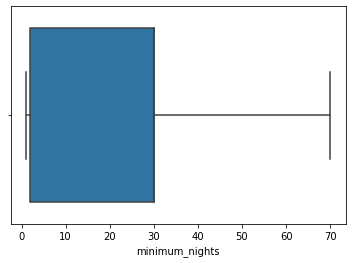

In [24]:
sb.boxplot(x=df['minimum_nights'])

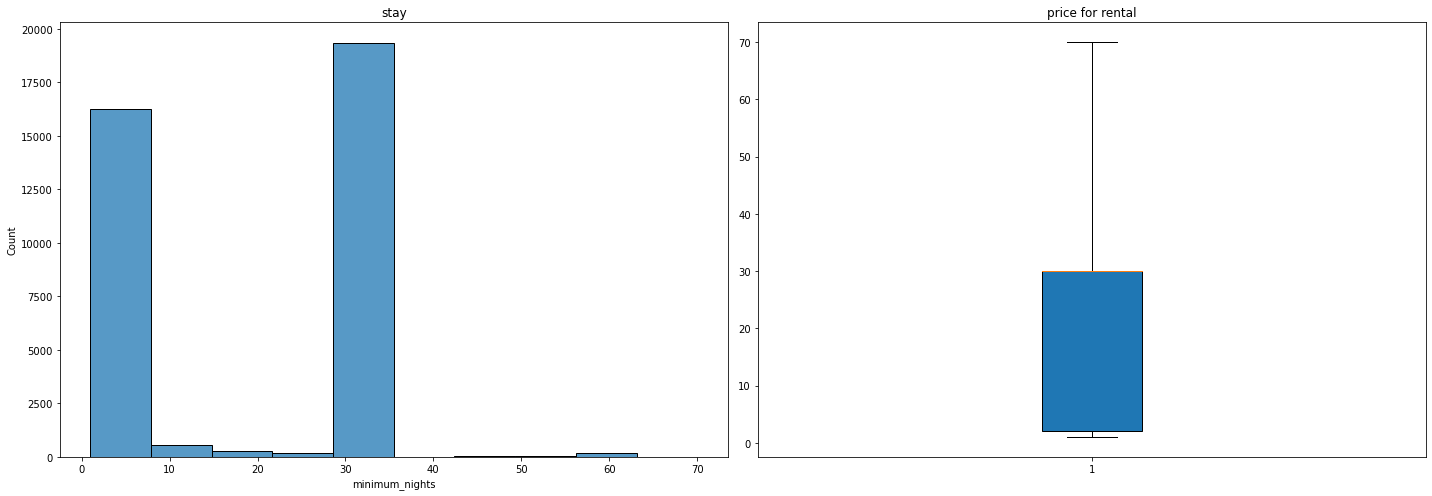

In [25]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["minimum_nights"],bins = 10, ax = axes[0])
plt.boxplot(df["minimum_nights"],patch_artist = True)
axes[0].set_title('stay')
axes[1].set_title('price for rental')
plt.tight_layout()
plt.show()

In [26]:
q1_id = df["id"].quantile(0.25)
q1_id
q3_id = df["id"].quantile(0.75)
q3_id 
IQR_id = q3_id - q1_id
upperbound_id = q3_id + (1.5 * IQR_id)
df = df.loc[~(df["id"]  > upperbound_id), ]

<AxesSubplot:xlabel='id'>

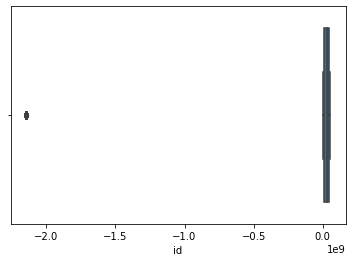

In [27]:
sb.boxplot(x=df['id'])

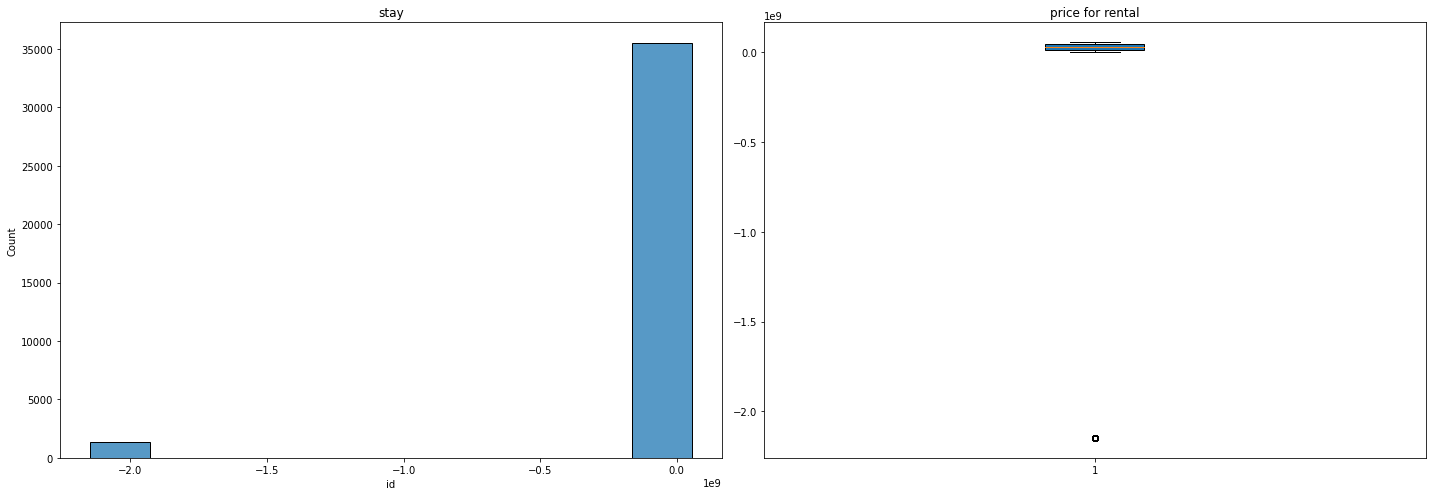

In [28]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["id"],bins = 10, ax = axes[0])
plt.boxplot(df["id"],patch_artist = True)
axes[0].set_title('stay')
axes[1].set_title('price for rental')
plt.tight_layout()
plt.show()

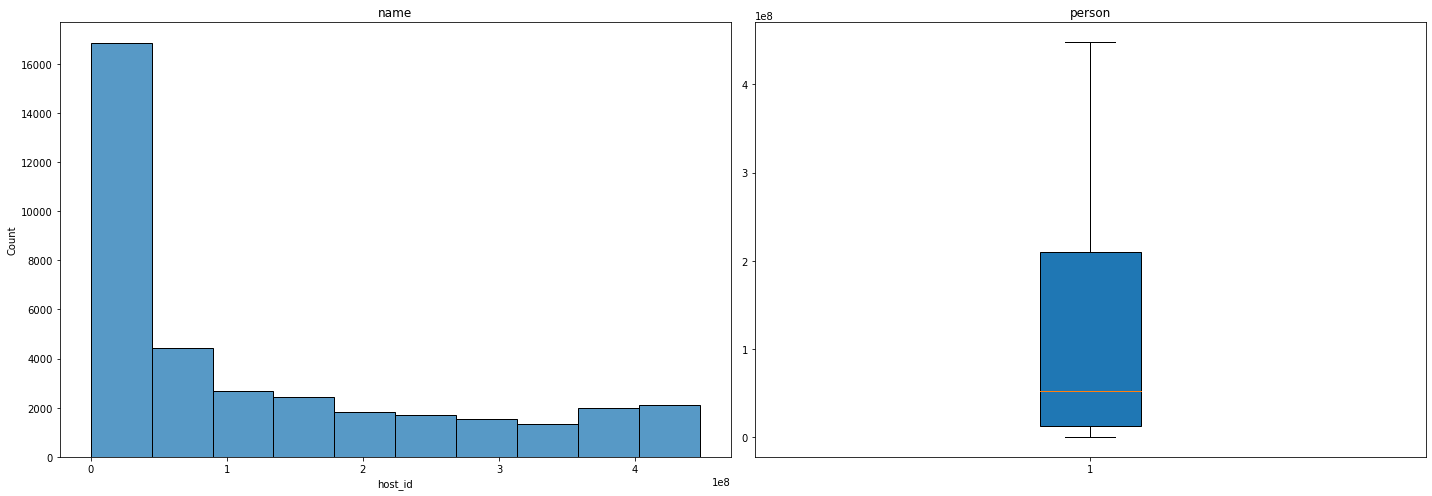

In [29]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["host_id"],bins = 10, ax = axes[0])
plt.boxplot(df["host_id"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [30]:
q1_latitude = df["latitude"].quantile(0.25)
q1_latitude
q3_latitude = df["latitude"].quantile(0.75)
q3_latitude
IQR_latitude = q3_latitude - q1_latitude
upperbound_latitude = q3_latitude + (1.5 * IQR_latitude)
lowerbound_latitude = q1_latitude - (1.5 * IQR_latitude)
df = df.loc[~(df["latitude"]  > upperbound_latitude), ]
df = df.loc[~(df["latitude"]  > lowerbound_latitude), ]


<AxesSubplot:xlabel='latitude'>

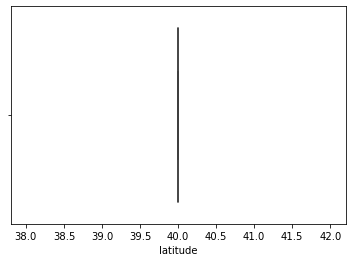

In [31]:
sb.boxplot(x=df['latitude'])

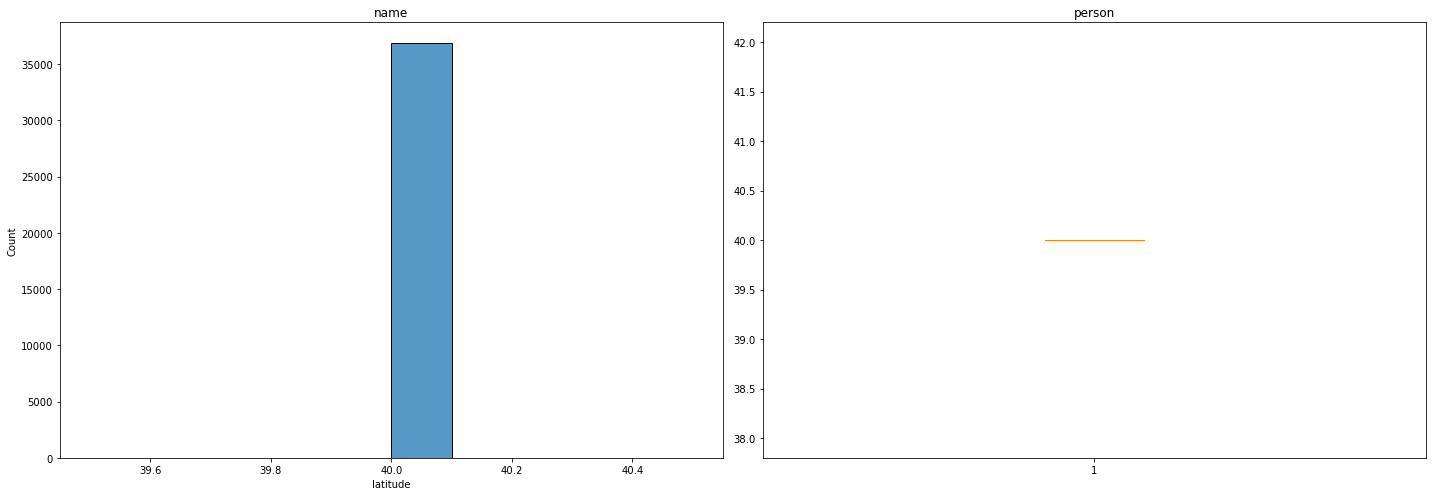

In [32]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["latitude"],bins = 10, ax = axes[0])
plt.boxplot(df["latitude"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='longitude'>

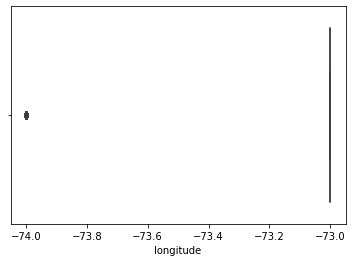

In [33]:
sb.boxplot(x=df['longitude'])

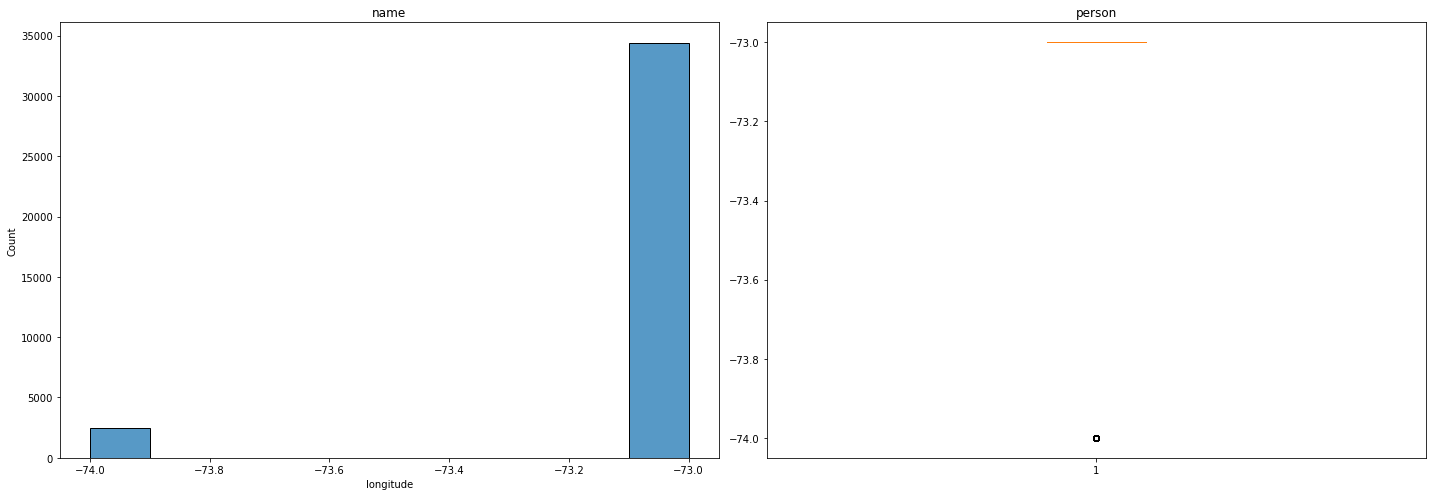

In [34]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["longitude"],bins = 10, ax = axes[0])
plt.boxplot(df["longitude"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [35]:
q1_number_of_reviews = df["number_of_reviews"].quantile(0.25)
q1_number_of_reviews
q3_number_of_reviews = df["number_of_reviews"].quantile(0.75)
q3_number_of_reviews 
IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
upperbound_number_of_reviews = q3_number_of_reviews + (1.5 * IQR_number_of_reviews)
df = df.loc[~(df["number_of_reviews"]  > upperbound_number_of_reviews), ]


<AxesSubplot:xlabel='number_of_reviews'>

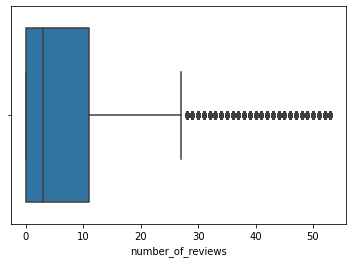

In [36]:
sb.boxplot(x=df['number_of_reviews'])

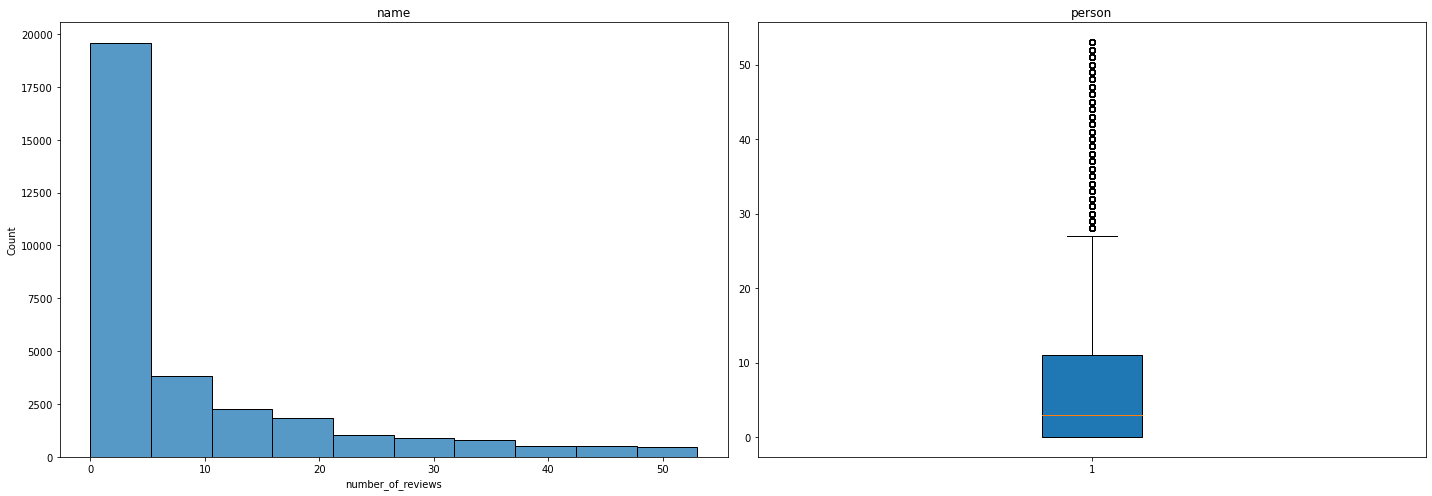

In [37]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["number_of_reviews"],bins = 10, ax = axes[0])
plt.boxplot(df["number_of_reviews"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [38]:
q1_reviews_per_month = df["reviews_per_month"].quantile(0.25)
q1_reviews_per_month
q3_reviews_per_month = df["reviews_per_month"].quantile(0.75)
q3_reviews_per_month 
IQR_reviews_per_month = q3_reviews_per_month - q1_reviews_per_month
upperbound_reviews_per_month = q3_reviews_per_month + (1.5 * IQR_reviews_per_month)
df = df.loc[~(df["reviews_per_month"]  > upperbound_reviews_per_month), ]


<AxesSubplot:xlabel='reviews_per_month'>

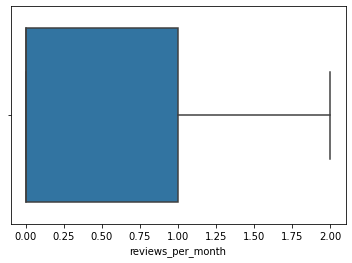

In [39]:
sb.boxplot(x=df['reviews_per_month'])

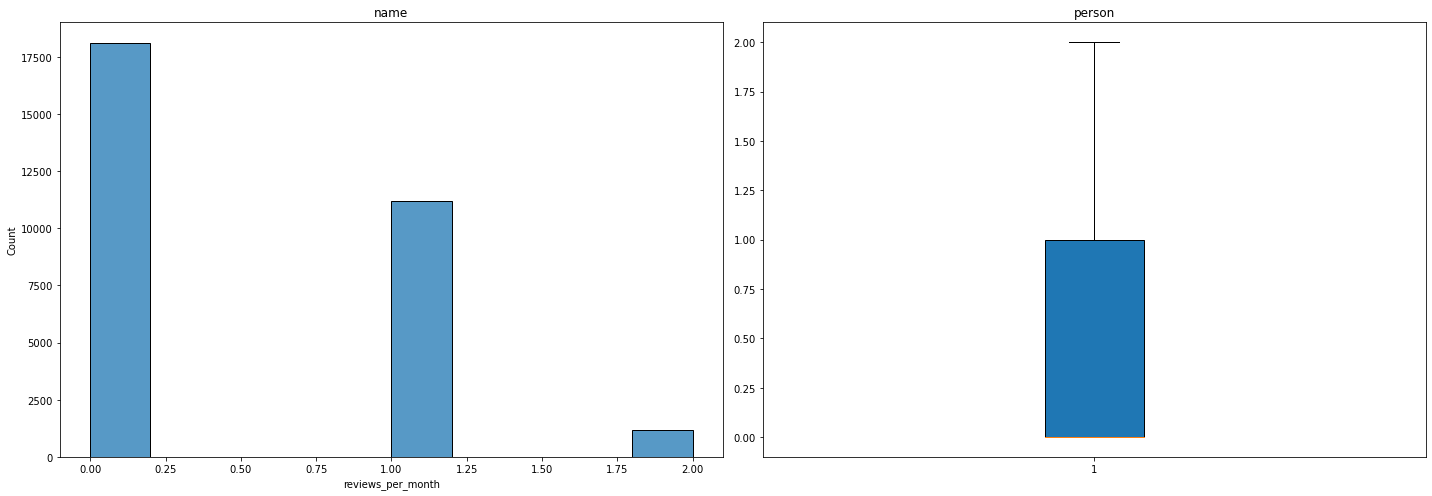

In [40]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["reviews_per_month"],bins = 10, ax = axes[0])
plt.boxplot(df["reviews_per_month"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [41]:
q1_calculated_host_listings_count = df["calculated_host_listings_count"].quantile(0.25)
q1_calculated_host_listings_count
q3_calculated_host_listings_count = df["calculated_host_listings_count"].quantile(0.75)
q3_calculated_host_listings_count
IQR_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count
upperbound_calculated_host_listings_count = q3_calculated_host_listings_count + (1.5 * IQR_calculated_host_listings_count)
df = df.loc[~(df["calculated_host_listings_count"]  > upperbound_calculated_host_listings_count), ]


<AxesSubplot:xlabel='calculated_host_listings_count'>

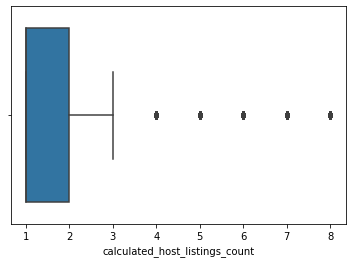

In [42]:
sb.boxplot(x=df['calculated_host_listings_count'])

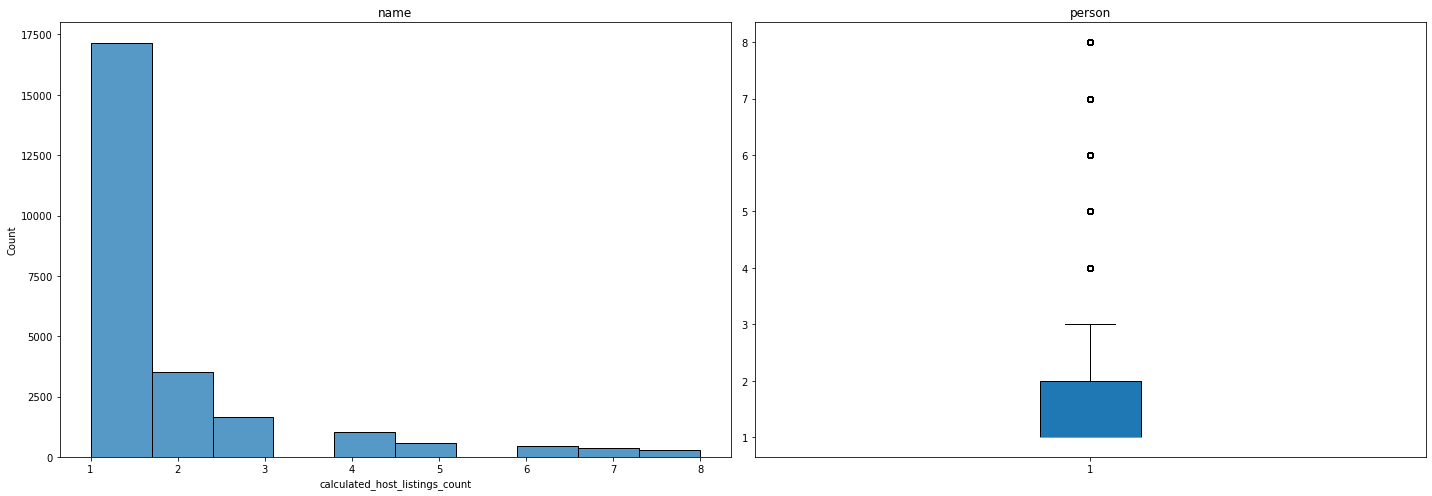

In [43]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["calculated_host_listings_count"],bins = 10, ax = axes[0])
plt.boxplot(df["calculated_host_listings_count"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [44]:
q1_availability_365 = df["availability_365"].quantile(0.25)
q1_availability_365
q3_availability_365 = df["availability_365"].quantile(0.75)
q3_availability_365
IQR_availability_365 = q3_availability_365 - q1_availability_365
upperbound_availability_365 = q3_availability_365 + (1.5 * IQR_availability_365)
df = df.loc[~(df["availability_365"]  > upperbound_availability_365), ]


<AxesSubplot:xlabel='availability_365'>

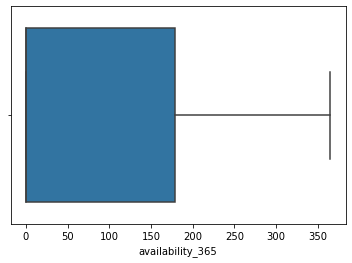

In [45]:
sb.boxplot(x=df['availability_365'])

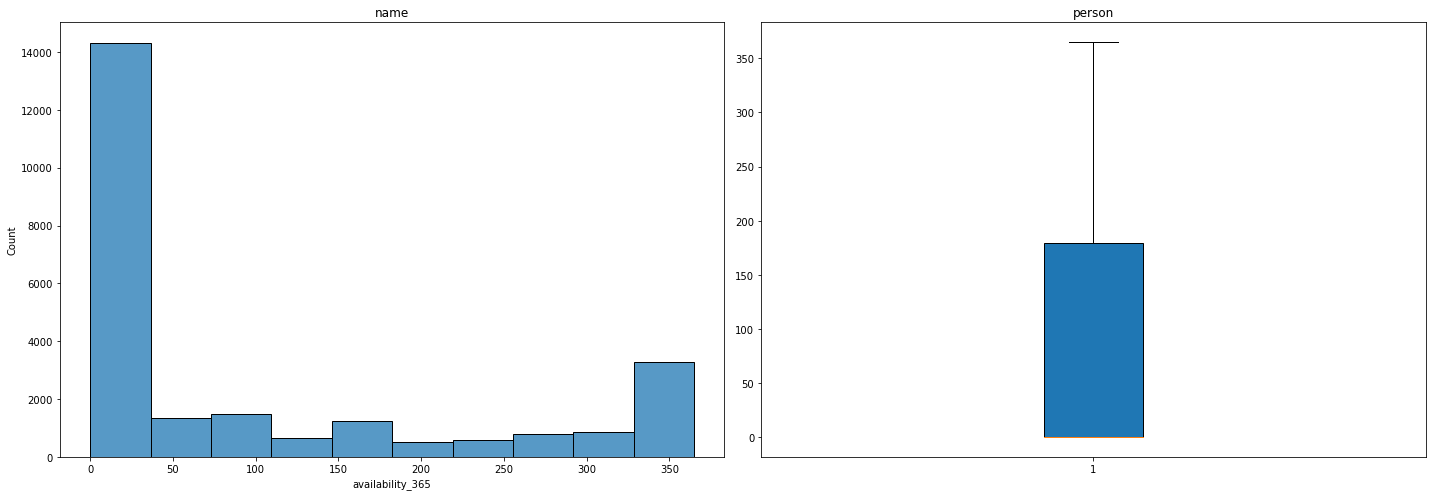

In [46]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["availability_365"],bins = 10, ax = axes[0])
plt.boxplot(df["availability_365"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [47]:
q1_number_of_reviews_ltm = df["number_of_reviews_ltm"].quantile(0.25)
q1_number_of_reviews_ltm
q3_number_of_reviews_ltm = df["number_of_reviews_ltm"].quantile(0.75)
q3_number_of_reviews_ltm
IQR_number_of_reviews_ltm = q3_number_of_reviews_ltm - q1_number_of_reviews_ltm
upperbound_number_of_reviews_ltm = q3_number_of_reviews_ltm + (1.5 * IQR_number_of_reviews_ltm)
df = df.loc[~(df["number_of_reviews_ltm"]  > upperbound_number_of_reviews_ltm), ]


<AxesSubplot:xlabel='number_of_reviews_ltm'>

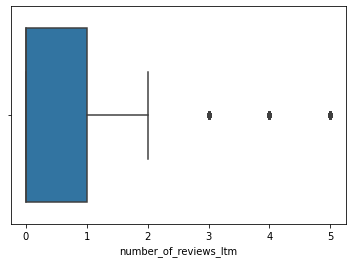

In [48]:
sb.boxplot(x=df['number_of_reviews_ltm'])

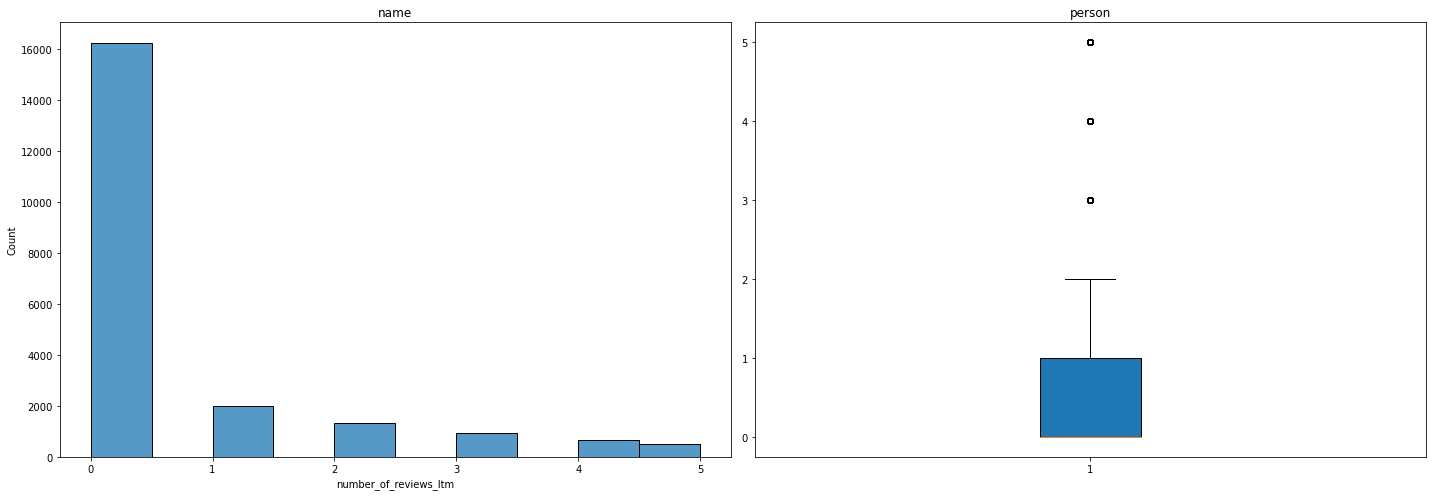

In [49]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
sb.histplot(df["number_of_reviews_ltm"],bins = 10, ax = axes[0])
plt.boxplot(df["number_of_reviews_ltm"],patch_artist = True)
axes[0].set_title('name')
axes[1].set_title('person')
plt.tight_layout()
plt.show()

In [50]:
df["room_type"] = df["room_type"].astype("category")

In [51]:
x = df.room_type.value_counts()

In [52]:
x

Entire home/apt    11599
Private room        9587
Shared room          405
Hotel room            64
Name: room_type, dtype: int64

In [53]:
x = df.groupby("room_type").mean()*100

In [54]:
x

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
room_type,,,,,,,,,,,
Entire home/apt,-7.060621e+09,9.269621e+09,4000.0,-7308.983533,22159.867230,2198.017070,676.403138,32.011380,148.633503,8294.318476,68.799034
Hotel room,3.749191e+09,2.574107e+10,4000.0,-7314.062500,19448.437500,982.812500,331.250000,54.687500,306.250000,9548.437500,43.750000
Private room,-6.185698e+09,1.094230e+10,4000.0,-7304.766872,10614.144154,2125.784917,635.287368,35.433399,188.140190,8632.773548,46.260561
Shared room,-6.642622e+09,1.525709e+10,4000.0,-7305.679012,18040.740741,2108.395062,566.419753,42.469136,259.753086,11720.987654,39.259259


([<matplotlib.patches.Wedge at 0x1f9c007d7c0>,
 [Text(0.6028163107070297, 0.920115479461989, 'Entire home/apt'),
  Text(-1.0539411635987497, 0.31497305229513445, 'Hotel room'),
  Text(-0.5437481126910114, -0.9562102226733216, 'Private room'),
  Text(0.7611260740498023, -0.794158107307062, 'Shared room')])

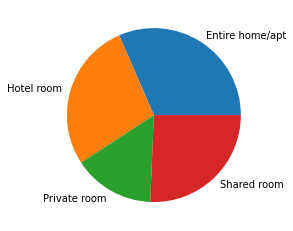

In [55]:
plt.pie(x["price"], labels = x.index)

In [56]:
by_area = pd.Series(df['neighbourhood_group']).value_counts().sort_index()
by_area.index = pd.Index(by_area.index)
df_area = by_area.rename_axis('location').reset_index(name='number')
df_area

,location,number
0,Bronx,690
1,Brooklyn,8984
2,Manhattan,9051
3,Queens,2774
4,Staten Island,156


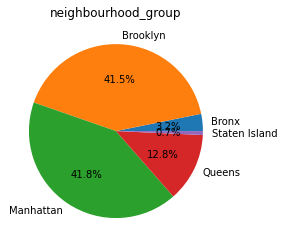

In [57]:
plt.pie(df_area["number"],labels=df_area["location"],autopct='%1.1f%%')  
plt.title("neighbourhood_group")
plt.show()

In [60]:
df["name"] = df["name"].astype("category")

In [61]:
df["neighbourhood_group"] = df["neighbourhood_group"].astype("category")

In [62]:
y = df.neighbourhood_group.value_counts()

In [63]:
y

Manhattan        9051
Brooklyn         8984
Queens           2774
Bronx             690
Staten Island     156
Name: neighbourhood_group, dtype: int64

In [64]:
y.index.categories

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

In [65]:
df["neighbourhood"] = df["neighbourhood"].astype("category")

In [66]:
df.dtypes

id                                         int32
name                                    category
host_id                                    int64
neighbourhood_group                     category
neighbourhood                           category
latitude                                   int32
longitude                                  int32
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
reviews_per_month                          int32
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
latest_review                     datetime64[ns]
dtype: object

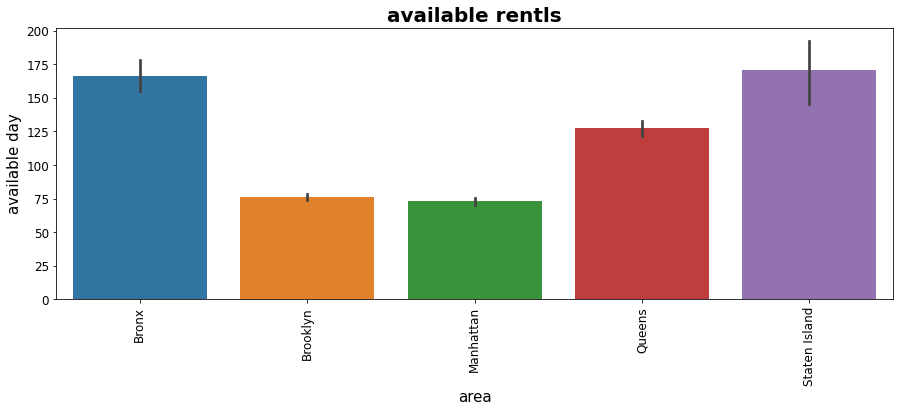

In [67]:
plt.figure(figsize=(15,5))
sb.barplot(x = df["neighbourhood_group"], y = df["availability_365"]) 
plt.title("available rentls" ,weight = "bold", size = 20)
plt.xlabel('area', fontsize = 15 )
plt.ylabel("available day", fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks( fontsize = 12)
plt.show()

In [68]:
numeric = []
category = []
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric.append(col)
    else:
        category.append(col)
print("category:", category)

category: ['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'license', 'latest_review']


In [69]:
df["room_type"].unique()

['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

In [70]:
df["latest_review"].unique()

array(['2019-11-04T00:00:00.000000000', '2019-12-02T00:00:00.000000000',
       '2021-08-08T00:00:00.000000000', ...,
       '2022-03-27T00:00:00.000000000', '2021-05-13T00:00:00.000000000',
       '2022-03-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [71]:
countroomtype = df.room_type[df['room_type']=="Entire home/apt"].count()
countroomtype1 = df.room_type[df['room_type']== 'Private room'].count()

In [72]:
countroomtype

11599

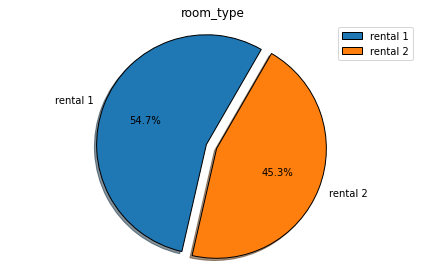

In [73]:
countroomtype = df.room_type[df['room_type']== "Entire home/apt"].count()
countroomtype1 = df.room_type[df['room_type']== "Private room"].count()

labels = ['rental 1', 'rental 2']
slices = [countroomtype, countroomtype1]
explode = [0.1,0]

plt.pie(slices, labels = labels,shadow=True,
       startangle = (+60), explode = explode, autopct = '%1.1f%%',
       wedgeprops = {'edgecolor' : 'black'})
plt.axis('equal')
plt.title("room_type")
plt.legend()
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Room Type vs Price')

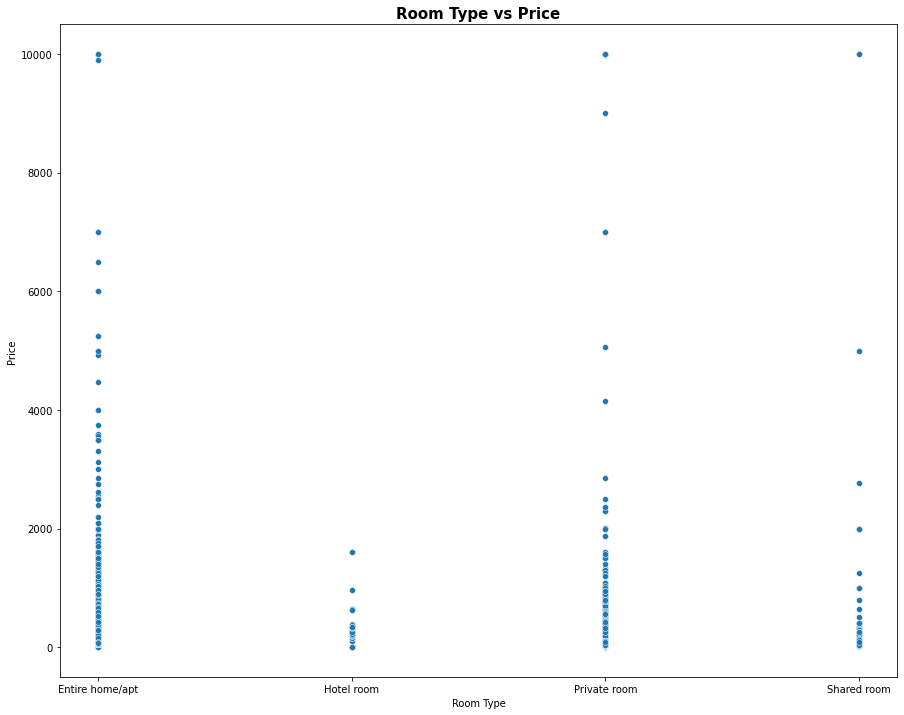

In [74]:
plt.figure(figsize=(15,12))
sb.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

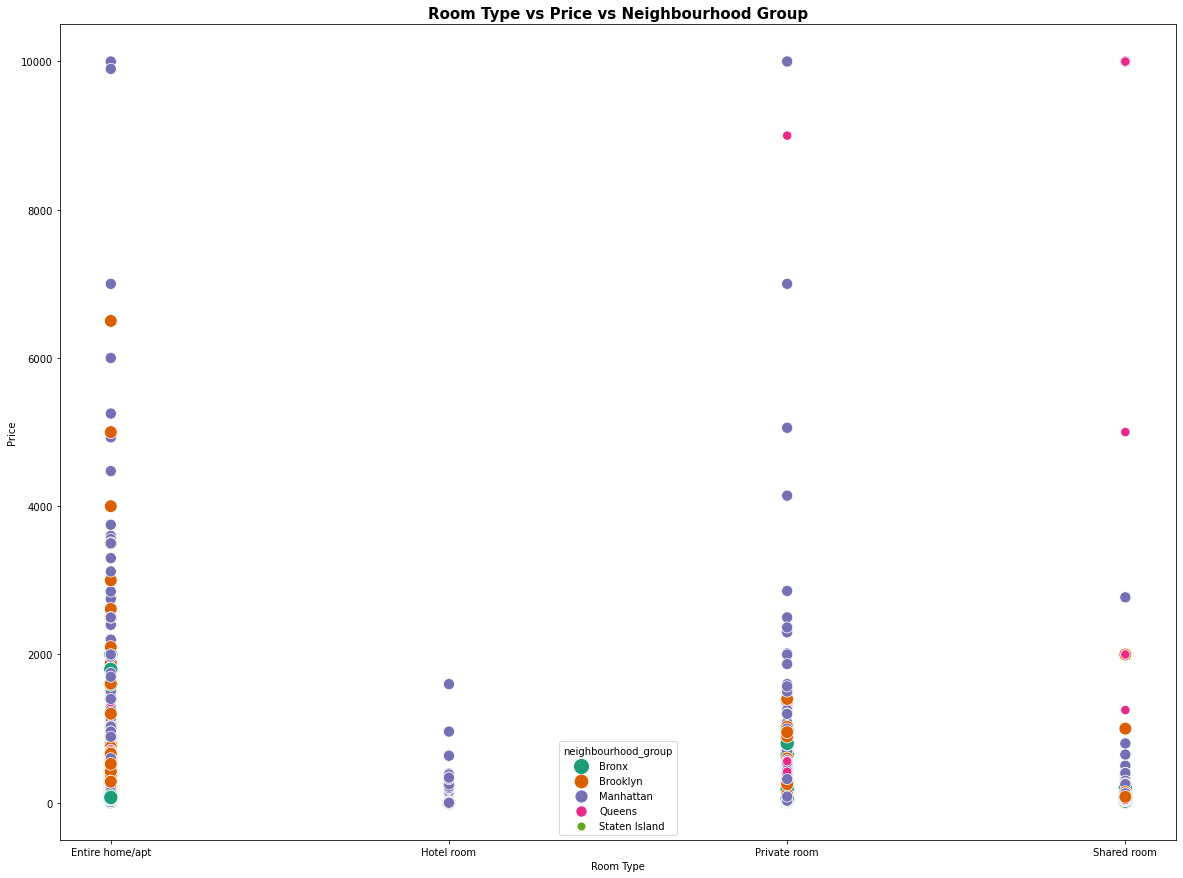

In [75]:
plt.figure(figsize=(20,15))
sb.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

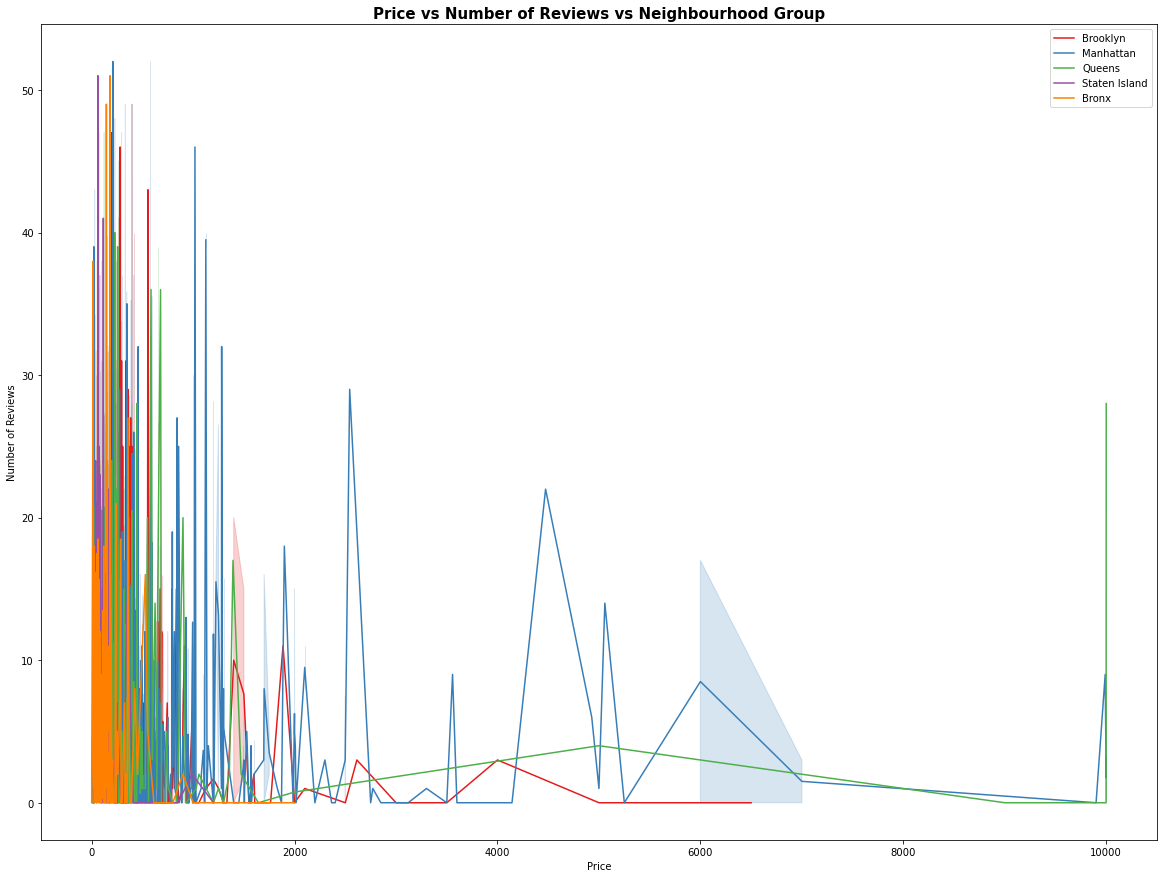

In [76]:
plt.figure(figsize=(20,15))
sb.set_palette("Set1")

sb.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sb.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sb.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Queens'],
             label='Queens')
sb.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sb.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=10)
plt.ylabel("Number of Reviews", size=10)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

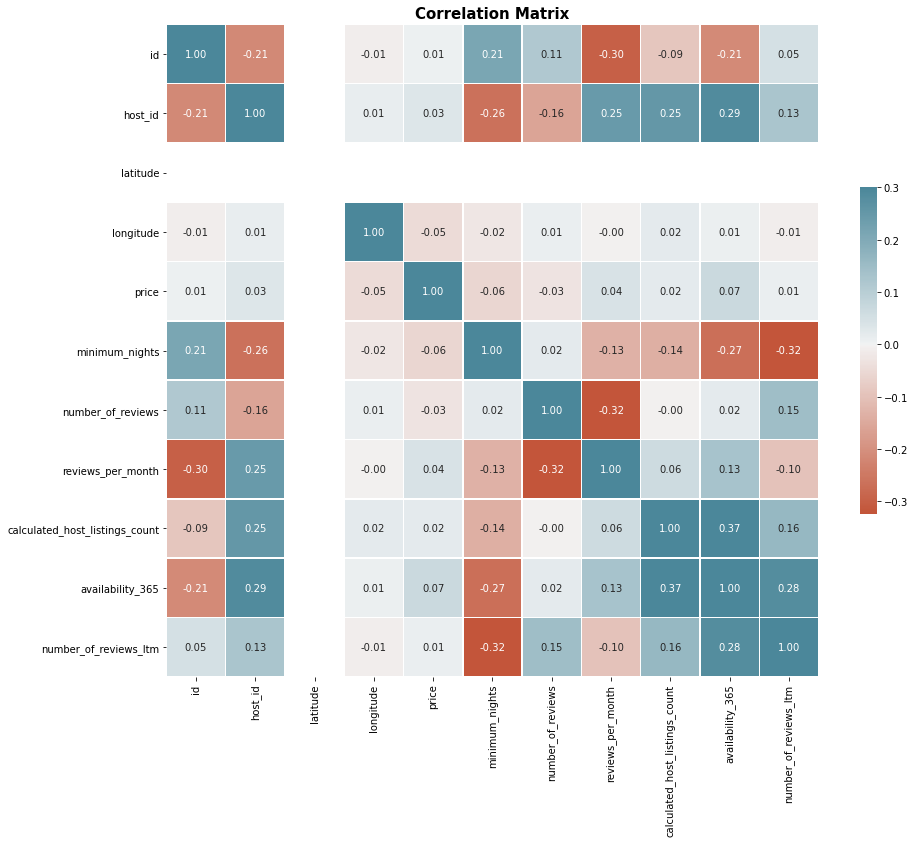

In [77]:
plt.figure(figsize=(15,12))
palette = sb.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sb.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [78]:
airbnb_features=df[['neighbourhood_group','room_type','availability_365','minimum_nights','calculated_host_listings_count','reviews_per_month','number_of_reviews']]
airbnb_features.head()

,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
0,Manhattan,Entire home/apt,334,30,3,0,48
1,Brooklyn,Private room,365,30,2,0,50
2,Brooklyn,Entire home/apt,201,5,1,0,2
7,Manhattan,Private room,365,30,2,1,0
9,Brooklyn,Private room,63,27,2,0,9


In [79]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,latest_review
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40,-73,Entire home/apt,150,30,48,0,3,334,0,NaN,2019-11-04
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40,-73,Private room,60,30,50,0,2,365,0,NaN,2019-12-02
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40,-73,Entire home/apt,275,5,2,0,1,201,1,NaN,2021-08-08
7,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Manhattan,East Harlem,40,-73,Private room,65,30,0,1,2,365,0,NaN,NaT
9,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Brooklyn,Williamsburg,40,-73,Private room,90,27,9,0,2,63,0,NaN,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37623,-2147483648,Amazing 1 private bed room in Manhattan.,428874795,Manhattan,Upper West Side,40,-73,Private room,76,1,0,1,1,364,0,NaN,NaT
37625,-2147483648,"Homey, modern townhouse with W/D and backyard",433972903,Bronx,Mott Haven,40,-73,Private room,55,21,0,1,8,90,0,NaN,NaT
37627,-2147483648,CONTACT BEFORE YOU BOOK R2,192407842,Manhattan,Harlem,40,-73,Private room,35,60,0,1,7,365,0,NaN,NaT
37628,-2147483648,CONTACT BEFORE YOU BOOK R1,192407842,Manhattan,Harlem,40,-73,Private room,28,30,0,1,7,334,0,NaN,NaT


In [80]:
X = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
X

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,150,30,48,0,3,334
1,60,30,50,0,2,365
2,275,5,2,0,1,201
7,65,30,0,1,2,365
9,90,27,9,0,2,63
...,...,...,...,...,...,...
37623,76,1,0,1,1,364
37625,55,21,0,1,8,90
37627,35,60,0,1,7,365
37628,28,30,0,1,7,334


In [81]:
y = df[['number_of_reviews_ltm']]

In [82]:
y

,number_of_reviews_ltm
0,0
1,0
2,1
7,0
9,0
...,...
37623,0
37625,0
37627,0
37628,0


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [84]:
X_train.shape

(17324, 6)

In [85]:
y_train.shape

(17324, 1)

In [86]:
y_test.shape

(4331, 1)

In [87]:
X_test.shape

(4331, 6)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:

from sklearn.metrics import accuracy_score

In [90]:
LR_model = LogisticRegression()

In [91]:
LR_model.fit(X_train, y_train)

LogisticRegression()

In [92]:
LR_pred = LR_model.predict(X_test)
LR_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
lr_ac = accuracy_score(y_test, LR_pred)*100

In [94]:
lr_ac

74.80951281459247

In [95]:
from sklearn.svm import SVC

In [96]:
model_svc = SVC()

In [97]:
model_svc.fit(X_train,y_train)

SVC()

In [98]:
svc_pred = model_svc.predict(X_test)

In [99]:
svc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
svc_ac = accuracy_score(y_test, svc_pred)*100
svc_ac

75.57146155622259

In [102]:
!pip install xgboost

In [103]:
import xgboost as xgb

In [104]:
xgb_classifier = xgb.XGBClassifier()

In [105]:
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [106]:
xgb_pred = xgb_classifier.predict(X_test)

In [107]:
xgb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
xgb_ac = accuracy_score(y_test, xgb_pred)*100
xgb_ac

84.06834449318865